# Correlation Analysis of IMDb Movie Dataset (1986-2016)

This analysis explores the relationships between different movie attributes over three decades (1986-2016), particularly focusing on correlations involving **budget**, **gross**, and **votes**. Using Python, the dataset was examined to reveal the most impactful factors in determining movie success.

## Project Outline

The main objectives of this analysis were to:
1. Explore the dataset.
2. Clean and preprocess the data.
3. Visualize and analyze correlations between variables.
4. Identify pairs with the highest correlations.

## 1. Importing Libraries
The following libraries were used in this analysis:
- **numpy** and **pandas** for data manipulation.
- **matplotlib** and **seaborn** for data visualization.

In [65]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6)

pd.options.mode.chained_assignment = None

## 2. Loading and Inspecting the Dataset
- Dataset: Three decades of IMDb movie data.

In [67]:
df = pd.read_csv(r'C:\Users\suhan\Downloads\movies.csv')

In [69]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## 3. Data Cleaning
### i) Checking for Null Values
Method: Used a loop to find the percentage of null values in each column.

In [71]:
#Data Cleaning 

for col in df.columns:
    null_val = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, null_val))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


### ii) Dropping Null Values
All null values were dropped to ensure data consistency.

In [73]:
df = df.dropna()

### iii) Rechecking for Nulls
A recheck confirmed no missing values remained.

In [75]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


### iv) Data Type Verification
Checked the data types of each column, then converted any float64 types to int64 where applicable.

In [77]:
#Datatypes Check
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [25]:
#Changing Datatypes
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [27]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


### v) Adding a Verification Column: *correct_year*
Created a new column to check if the *year* and *released* columns showed consistent year values.

In [79]:
#Create a new column
df['correct_year'] = df['released'].astype(str).str.extract(r'(\d{4})')
df['correct_year'] = df['correct_year'].astype('int64')

## 4. Initial Observations
Sorted movies by *gross* in descending order to identify the highest-grossing movies in the dataset.

In [31]:
df = df.sort_values(by=['gross'], inplace= False, ascending= False)

#### Assumptions
- 1. **Budget** might have a strong correlation with **gross**.
- 2. **Company** might impact movie **gross**.

In [ ]:
#ASSUMPTIONS
#Budget - High Correlation
#Company - High Correlation

## 5. Visualizing Relationships
### Scatter Plot: Budget vs. Gross
To investigate the relationship between **budget** and **gross**, a scatter plot was created.

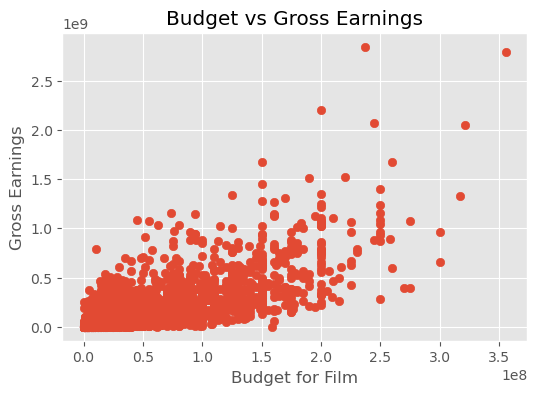

In [39]:
#Scatter Plot - Budget vs Gross
matplotlib.rcParams['figure.figsize'] = (6,4)

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show()

### Regression Plot: Budget vs. Gross
A *seaborn.regplot* was added to further assess correlation.

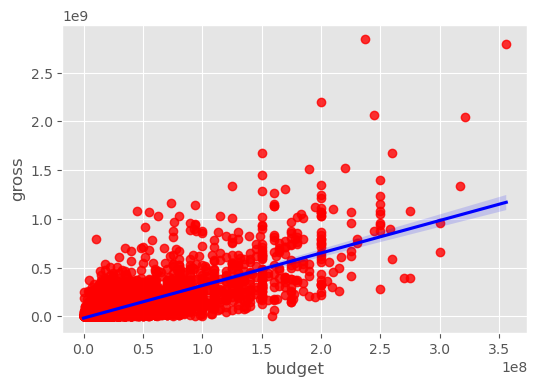

In [81]:
#Budget vs Gross using Regression Plot
matplotlib.rcParams['figure.figsize'] = (6,4)
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.show()

## 6. Correlation Analysis
### Correlation Matrix
Computed correlations for all numerical fields in the dataset using corr().

In [45]:
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()

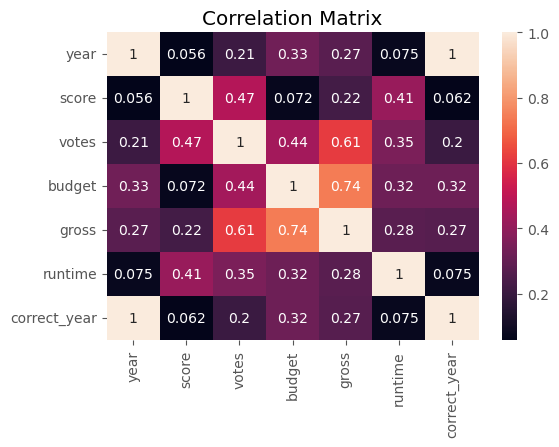

In [47]:
#Creating a Heat Map of Correlations

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix')
plt.show()

### Object Type Conversion
To include categorical variables in the analysis, object types were numerized.

In [49]:
#Numerizing the object types
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96,2015
2434,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97,1994
3681,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108,2001
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85,1982


## 7. Heatmap of Numerized Data
A second heatmap was generated after numerizing object types.

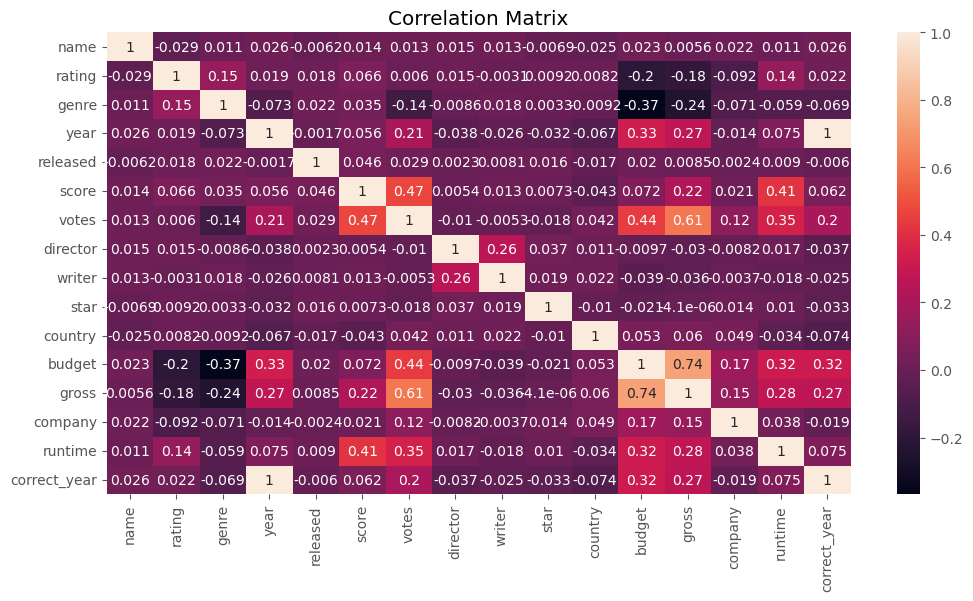

In [53]:
correlation_mat = df_numerized.corr()
matplotlib.rcParams['figure.figsize'] = (12,6)

sns.heatmap(correlation_mat, annot= True)

plt.title('Correlation Matrix')
plt.show()

In [183]:
#High Correlation- (budget,gross), (gross,votes)

## 8. Identifying High Correlations
- Method: Used unstack() and sort_values() on the correlation matrix.
- Filtered results to find correlations > 0.5.

In [55]:
corr_pairs = correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
                                ...   
correct_year  budget          0.320312
              gross           0.268721
              company        -0.018806
              runtime         0.075294
              correct_year    1.000000
Length: 256, dtype: float64

In [57]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.368523
budget        genre          -0.368523
gross         genre          -0.244101
genre         gross          -0.244101
rating        budget         -0.203946
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
Length: 256, dtype: float64

In [59]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross         votes           0.614751
votes         gross           0.614751
gross         budget          0.740247
budget        gross           0.740247
year          correct_year    0.998726
correct_year  year            0.998726
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64

In [185]:
#Confirm - High correlation (budget,gross),(gross,votes)

### Key Findings
The highest correlations were found between:
- Budget and Gross
- Gross and Votes
- 
This confirms our initial assumption about the strong impact of budget on gross earnings and the influence of votes on a movie's popularity.

## Conclusion
The correlation analysis highlighted that **budget** and **gross earnings** are strongly related, suggesting a larger budget often contributes to higher gross revenue. Additionally, **gross** and **votes** are significantly correlated, indicating that popular movies tend to have higher vote counts on IMDb.